In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv']

#### Clean df and combine into 1

In [3]:
data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths:
    print(path)
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.drop([0,1,2,3,4])

    print(data_RFID_int.shape)
    
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    
    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['start_datetime_correct'] = [x.replace(year = 2020) - dt.timedelta(days = 2) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['date'] = data_RFID_int['start_datetime_correct'].dt.date 
    data_RFID_int['day'] = data_RFID_int['start_datetime_correct'].dt.day 
    data_RFID_int['start_time'] = [x.split(' ')[1] for x in data_RFID_int['start_datetime_correct'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['hour'] = data_RFID_int['start_datetime_correct'].dt.hour
    data_RFID_int['min'] = data_RFID_int['start_datetime_correct'].dt.minute

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')
    
data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.10.02.csv
(12969, 14)
(12968, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.25.csv
(22276, 14)
(35243, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.18.csv
(16273, 14)
(51515, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.15.csv
(6509, 14)
(58023, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.13.csv
(3845, 14)
(61867, 21) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/RFID/r1.1m/Idspyder-20.09.11.csv
(5844, 14)
(67710, 21) 



,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min
5,44108.7050276968,041A555C80,unknown,RFID3,2.429,NaN,NaN,10.0,NaN,NaN,NaN,"0,984,115,242,115,86,143,286,242,216",NaN,NaN,2090-10-06 16:55:14.393020800,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55
6,44108.7050764699,041A555C80,unknown,RFID3,5.377,NaN,NaN,32.0,NaN,NaN,NaN,"0,115,114,115,114,146,83,115,113,116,114,115,414,346,283,115,151,106,86,114,154,115,113,77,146,82,115,149,922,200,214,215",NaN,NaN,2090-10-06 16:55:18.607008000,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55
7,44108.7051850579,041A555C80,unknown,RFID4,0.886,NaN,NaN,5.0,NaN,NaN,NaN,"0,314,241,89,242",NaN,NaN,2090-10-06 16:55:27.989011200,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55
8,44108.7052078935,041A555C80,unknown,RFID4,0.342,NaN,NaN,4.0,NaN,NaN,NaN,"0,146,83,113",NaN,NaN,2090-10-06 16:55:29.962041599,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55
9,44108.7053131713,041A555C80,unknown,RFID2,0.445,NaN,NaN,2.0,NaN,NaN,NaN,"0,445",NaN,NaN,2090-10-06 16:55:39.057974400,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55


#### Compute endtime 

In [4]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['end_datetime'] = data_RFID.apply(lambda row: add_duration(row['start_datetime_correct'], row['eventDuration']), axis=1)
data_RFID['end_time'] = [x.split(' ')[1] for x in data_RFID['end_datetime'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(67710, 23)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time
5,44108.7050276968,041A555C80,unknown,RFID3,2.429,NaN,NaN,10.0,NaN,NaN,NaN,"0,984,115,242,115,86,143,286,242,216",NaN,NaN,2090-10-06 16:55:14.393020800,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55,2020-10-04 16:55:16.822020800,16:55:16
6,44108.7050764699,041A555C80,unknown,RFID3,5.377,NaN,NaN,32.0,NaN,NaN,NaN,"0,115,114,115,114,146,83,115,113,116,114,115,414,346,283,115,151,106,86,114,154,115,113,77,146,82,115,149,922,200,214,215",NaN,NaN,2090-10-06 16:55:18.607008000,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55,2020-10-04 16:55:23.984008000,16:55:23
7,44108.7051850579,041A555C80,unknown,RFID4,0.886,NaN,NaN,5.0,NaN,NaN,NaN,"0,314,241,89,242",NaN,NaN,2090-10-06 16:55:27.989011200,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55,2020-10-04 16:55:28.875011200,16:55:28
8,44108.7052078935,041A555C80,unknown,RFID4,0.342,NaN,NaN,4.0,NaN,NaN,NaN,"0,146,83,113",NaN,NaN,2090-10-06 16:55:29.962041599,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55,2020-10-04 16:55:30.304041599,16:55:30
9,44108.7053131713,041A555C80,unknown,RFID2,0.445,NaN,NaN,2.0,NaN,NaN,NaN,"0,445",NaN,NaN,2090-10-06 16:55:39.057974400,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55,2020-10-04 16:55:39.502974400,16:55:39


#### Add light dark

In [5]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_RFID['ld_seg'] = data_RFID['hour'].apply(assign_ld)

print(data_RFID.shape)
data_RFID.head()

(67710, 24)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg
5,44108.7050276968,041A555C80,unknown,RFID3,2.429,NaN,NaN,10.0,NaN,NaN,NaN,"0,984,115,242,115,86,143,286,242,216",NaN,NaN,2090-10-06 16:55:14.393020800,2020-10-04 16:55:14.393020800,2020-10-04,4,16:55:14,16,55,2020-10-04 16:55:16.822020800,16:55:16,light
6,44108.7050764699,041A555C80,unknown,RFID3,5.377,NaN,NaN,32.0,NaN,NaN,NaN,"0,115,114,115,114,146,83,115,113,116,114,115,414,346,283,115,151,106,86,114,154,115,113,77,146,82,115,149,922,200,214,215",NaN,NaN,2090-10-06 16:55:18.607008000,2020-10-04 16:55:18.607008000,2020-10-04,4,16:55:18,16,55,2020-10-04 16:55:23.984008000,16:55:23,light
7,44108.7051850579,041A555C80,unknown,RFID4,0.886,NaN,NaN,5.0,NaN,NaN,NaN,"0,314,241,89,242",NaN,NaN,2090-10-06 16:55:27.989011200,2020-10-04 16:55:27.989011200,2020-10-04,4,16:55:27,16,55,2020-10-04 16:55:28.875011200,16:55:28,light
8,44108.7052078935,041A555C80,unknown,RFID4,0.342,NaN,NaN,4.0,NaN,NaN,NaN,"0,146,83,113",NaN,NaN,2090-10-06 16:55:29.962041599,2020-10-04 16:55:29.962041599,2020-10-04,4,16:55:29,16,55,2020-10-04 16:55:30.304041599,16:55:30,light
9,44108.7053131713,041A555C80,unknown,RFID2,0.445,NaN,NaN,2.0,NaN,NaN,NaN,"0,445",NaN,NaN,2090-10-06 16:55:39.057974400,2020-10-04 16:55:39.057974400,2020-10-04,4,16:55:39,16,55,2020-10-04 16:55:39.502974400,16:55:39,light


#### Map unitLabel and bottle contents

In [6]:
unitLabel_map = {'RFID1': 'RFID_10',
                 'RFID2': 'RFID_05',
                 'RFID3': 'RFID_20',
                 'RFID4': 'RFID_H20'}

data_RFID['unitLabel_drink'] = data_RFID['unitLabel'].map(unitLabel_map)
print(data_RFID.shape)

(67710, 25)


#### Add metadata and clean

In [7]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_1m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 33)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,DateTime,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg,unitLabel_drink
0,2,2,998,sham,041A55594C,2020-09-21 12:02:50,30.6,leak,5,44092.7053505556,unknown,RFID2,0.227,NaN,NaN,3.0,NaN,NaN,NaN,"0,143,84",NaN,NaN,2090-09-20 16:55:42.288038400,2020-09-18 16:55:42.288038400,2020-09-18,18,16:55:42,16,55,2020-09-18 16:55:42.515038400,16:55:42,light,RFID_05
1,2,2,998,sham,041A55594C,2020-09-21 12:02:50,30.6,leak,6,44092.7053695602,unknown,RFID2,2.286,NaN,NaN,7.0,NaN,NaN,NaN,"0,114,115,913,316,314,514",NaN,NaN,2090-09-20 16:55:43.929983999,2020-09-18 16:55:43.929983999,2020-09-18,18,16:55:43,16,55,2020-09-18 16:55:46.215983999,16:55:46,light,RFID_05
2,2,2,998,sham,041A55594C,2020-09-21 12:02:50,30.6,leak,7,44092.7054081481,unknown,RFID2,0.980,NaN,NaN,7.0,NaN,NaN,NaN,"0,209,86,242,87,149,207",NaN,NaN,2090-09-20 16:55:47.263987200,2020-09-18 16:55:47.263987200,2020-09-18,18,16:55:47,16,55,2020-09-18 16:55:48.243987200,16:55:48,light,RFID_05
3,2,2,998,sham,041A55594C,2020-09-21 12:02:50,30.6,leak,8,44092.70707375,unknown,RFID2,4.999,NaN,NaN,22.0,NaN,NaN,NaN,"0,71,315,242,214,87,242,287,242,488,443,86,241,419,820,119,72,115,156,73,114,153",NaN,NaN,2090-09-20 16:58:11.171999999,2020-09-18 16:58:11.171999999,2020-09-18,18,16:58:11,16,58,2020-09-18 16:58:16.170999999,16:58:16,light,RFID_05
4,2,2,998,sham,041A55594C,2020-09-21 12:02:50,30.6,leak,9,44092.7071533218,unknown,RFID2,1.374,NaN,NaN,11.0,NaN,NaN,NaN,"0,242,87,151,78,115,147,114,118,79,243",NaN,NaN,2090-09-20 16:58:18.047020800,2020-09-18 16:58:18.047020800,2020-09-18,18,16:58:18,16,58,2020-09-18 16:58:19.421020800,16:58:19,light,RFID_05


#### Add day, hour, and min counts

In [8]:
#split by round to get specific dates
data_RFID_r1 = data_RFID_final[data_RFID_final['Round'] == 1]
data_RFID_r2 = data_RFID_final[data_RFID_final['Round'] == 2]
data_RFID_r3 = data_RFID_final[data_RFID_final['Round'] == 3]
data_RFID_r4 = data_RFID_final[data_RFID_final['Round'] == 4]

#column of running day count
dat_map = dict(zip(data_RFID_r1['date'].unique(), np.arange(1,len(data_RFID_r1['date'].unique())+1)))
data_RFID_r1['day_count'] = data_RFID_r1['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r1['hour_count'] = (data_RFID_r1['day_count']*24) + data_RFID_r1['hour'] - 24
data_RFID_r1['min_count'] = (data_RFID_r1['hour_count']*60) + data_RFID_r1['min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r2['date'].unique(), np.arange(1,len(data_RFID_r2['date'].unique())+1)))
data_RFID_r2['day_count'] = data_RFID_r2['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r2['hour_count'] = (data_RFID_r2['day_count']*24) + data_RFID_r2['hour'] - 24
data_RFID_r2['min_count'] = (data_RFID_r2['hour_count']*60) + data_RFID_r2['min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r3['date'].unique(), np.arange(1,len(data_RFID_r3['date'].unique())+1)))
data_RFID_r3['day_count'] = data_RFID_r3['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r3['hour_count'] = (data_RFID_r3['day_count']*24) + data_RFID_r3['hour'] - 24
data_RFID_r3['min_count'] = (data_RFID_r3['hour_count']*60) + data_RFID_r3['min'] - 60

#column of running day count
dat_map = dict(zip(data_RFID_r4['date'].unique(), np.arange(1,len(data_RFID_r4['date'].unique())+1)))
data_RFID_r4['day_count'] = data_RFID_r4['date'].map(dat_map)
#column of running hour and minute count
data_RFID_r4['hour_count'] = (data_RFID_r4['day_count']*24) + data_RFID_r4['hour'] - 24
data_RFID_r4['min_count'] = (data_RFID_r4['hour_count']*60) + data_RFID_r4['min'] - 60

#combine back together
data_RFID_final = pd.concat([data_RFID_r1, data_RFID_r2, data_RFID_r3, data_RFID_r4], axis=0)
print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 36)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,DateTime,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3,start_datetime,start_datetime_correct,date,day,start_time,hour,min,end_datetime,end_time,ld_seg,unitLabel_drink,day_count,hour_count,min_count
51515,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,14,44089.4790173843,unknown,RFID2,0.229,NaN,NaN,3.0,NaN,NaN,NaN,"0,114,115",NaN,NaN,2090-09-17 11:29:47.101977600,2020-09-15 11:29:47.101977600,2020-09-15,15,11:29:47,11,29,2020-09-15 11:29:47.330977600,11:29:47,light,RFID_05,1,11,629
51516,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,15,44089.4790356134,unknown,RFID2,1.141,NaN,NaN,6.0,NaN,NaN,NaN,"0,209,117,86,614,115",NaN,NaN,2090-09-17 11:29:48.676963200,2020-09-15 11:29:48.676963200,2020-09-15,15,11:29:48,11,29,2020-09-15 11:29:49.817963200,11:29:49,light,RFID_05,1,11,629
51517,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,16,44089.4790721296,unknown,RFID2,0.259,NaN,NaN,3.0,NaN,NaN,NaN,"0,115,144",NaN,NaN,2090-09-17 11:29:51.832032000,2020-09-15 11:29:51.832032000,2020-09-15,15,11:29:51,11,29,2020-09-15 11:29:52.091032000,11:29:52,light,RFID_05,1,11,629
51518,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,17,44089.4791021875,unknown,RFID1,4.732,NaN,NaN,29.0,NaN,NaN,NaN,"0,147,82,114,115,155,74,114,115,114,115,147,118,78,115,154,107,82,115,114,915,242,87,614,115,114,153,115,202",NaN,NaN,2090-09-17 11:29:54.428956800,2020-09-15 11:29:54.428956800,2020-09-15,15,11:29:54,11,29,2020-09-15 11:29:59.160956800,11:29:59,light,RFID_10,1,11,629
51519,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,NaN,19,44089.4842788542,unknown,RFID4,1.601,NaN,NaN,8.0,NaN,NaN,NaN,"0,313,115,114,241,88,615,115",NaN,NaN,2090-09-17 11:37:21.692985600,2020-09-15 11:37:21.692985600,2020-09-15,15,11:37:21,11,37,2020-09-15 11:37:23.293985600,11:37:23,light,RFID_H20,1,11,637


In [9]:
data_RFID_final = data_RFID_final[['Round', 'Cage', 'Animal', 'Injury', 'IdRFID', 'we_switch', 'weight_pre',
                                   'unitLabel_drink', 'eventDuration', 
                                   'date', 'day', 'start_time', 'end_time', 'ld_seg', 'hour', 'min', 
                                   'day_count', 'hour_count', 'min_count']]

print(data_RFID_final.shape)
data_RFID_final.head()

(67710, 19)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,unitLabel_drink,eventDuration,date,day,start_time,end_time,ld_seg,hour,min,day_count,hour_count,min_count
51515,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_05,0.229,2020-09-15,15,11:29:47,11:29:47,light,11,29,1,11,629
51516,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_05,1.141,2020-09-15,15,11:29:48,11:29:49,light,11,29,1,11,629
51517,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_05,0.259,2020-09-15,15,11:29:51,11:29:52,light,11,29,1,11,629
51518,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_10,4.732,2020-09-15,15,11:29:54,11:29:59,light,11,29,1,11,629
51519,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_H20,1.601,2020-09-15,15,11:37:21,11:37:23,light,11,37,1,11,637


#### Viz

RFID_05


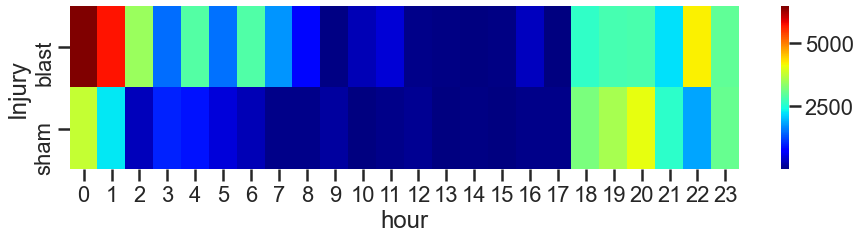

RFID_20


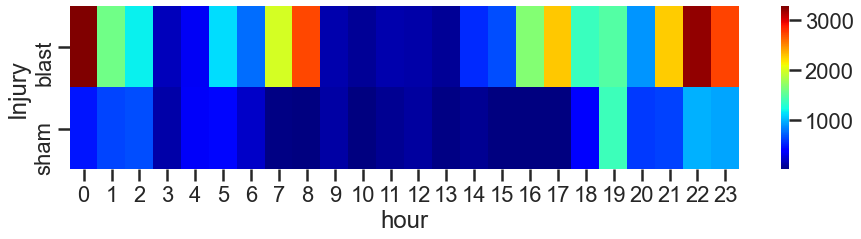

RFID_H20


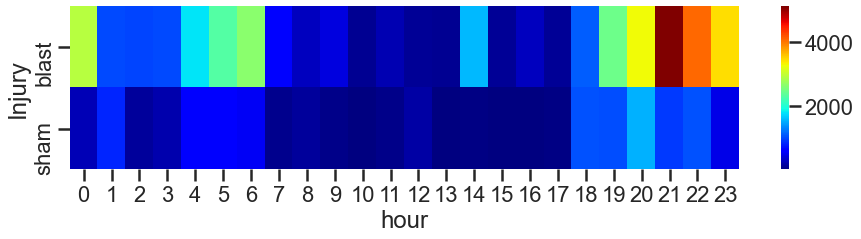

RFID_10


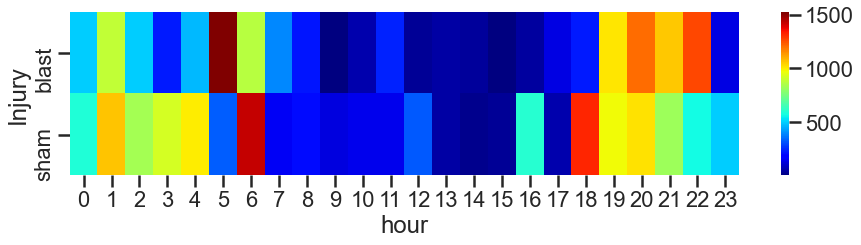

In [10]:
data_heat = data_RFID_final[(data_RFID_final['day_count'] > 3)]

for variable in data_heat['unitLabel_drink'].unique():
    print(variable)
    #select variable
    data_int = data_heat[data_heat['unitLabel_drink'] == variable]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['Injury', 'hour'])['eventDuration'].sum().reset_index()
    #viz
    groupby = groupby.pivot("Injury", "hour", "eventDuration")
    plt.figure(figsize=(15,3))
    ax = sns.heatmap(groupby, cmap="jet")
    plt.show()

### VDM data

#### Get paths for files to process

In [11]:
#create list of dir paths
VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m'
    
VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)
    
VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.201002.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200925.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200911.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200918.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv',
 '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv']

#### Clean df and combine into 1

In [12]:
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths:
    print(path)
    
    data_VDM_int = pd.read_csv(path)
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    print(data_VDM_int.shape)
    
    #add info from file name
    data_VDM_int['Cohort'] = path.split('/')[-2].split('.')[0]
    data_VDM_int['TP'] = path.split('/')[-2].split('.')[1]
    data_VDM_int['Drink'] = path.split('/')[-1].split('.')[0]
    data_VDM_int['StartDate'] = path.split('/')[-1].split('.')[1]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')
    
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.201002.1m.csv
(216584, 11)
(216584, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200928.1m.csv
(423774, 11)
(640358, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200925.1m.csv
(340059, 11)
(980417, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200911.1m.csv
(241967, 11)
(1222384, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/water.200918.1m.csv
(302272, 11)
(1524656, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200913.1m.csv
(533853, 11)
(2058509, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.201004.1m.csv
(511519, 11)
(2570028, 15) 

/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/VDM/r1.1m/etoh.200921.1m.csv
(440884, 11)
(3010912, 15) 



,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml).1,Drinking Accum (ml).1,Drinking (ml).2,Drinking Accum (ml).2,Drinking (ml).3,Drinking Accum (ml).3,Cohort,TP,Drink,StartDate
0,0,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
1,0,2,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
2,1,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
3,1,2,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002
4,2,1,10/2/2020 15:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,r1,1m,water,201002


#### Clean up column names

In [13]:
data_VDM.columns = ['Int', 'Cage_VDM', 'Time', 
                    'VDM_10', 'VDM_1_accum',
                    'VDM_05', 'VDM_2_accum', 
                    'VDM_20', 'VDM_3_accum', 
                    'VDM_H20', 'VDM_4_accum',
                    'Cohort', 'TP', 'Drink', 'StartDate']

data_VDM = data_VDM[['Cage_VDM', 'Cohort', 'TP', 'Drink', 'StartDate', 'Time', 'VDM_10', 'VDM_05', 'VDM_20', 'VDM_H20']]

data_VDM.tail()

,Cage_VDM,Cohort,TP,Drink,StartDate,Time,VDM_10,VDM_05,VDM_20,VDM_H20
440879,2,r1,1m,etoh,200921,09/25/20 13:32:04,0.0,0.0,0.0,0.0
440880,1,r1,1m,etoh,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440881,2,r1,1m,etoh,200921,09/25/20 13:32:05,0.0,0.0,0.0,0.0
440882,1,r1,1m,etoh,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0
440883,2,r1,1m,etoh,200921,09/25/20 13:32:07,0.0,0.0,0.0,0.0


#### Convert liquid vol to etoh vol

In [14]:
data_VDM['VDM_10_etoh'] = data_VDM['VDM_10']*.1
data_VDM['VDM_20_etoh'] = data_VDM['VDM_20']*.2
data_VDM['VDM_05_etoh'] = data_VDM['VDM_05']*.05

#### Make into tidy df

In [15]:
#melt dataframe (new column of parameters)

meta_params = ['Cage_VDM', 'Cohort', 'TP', 'Drink', 'StartDate', 'Time']
intake_params = ['VDM_10_etoh', 'VDM_05_etoh', 'VDM_20_etoh', 'VDM_H20']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(12043648, 8)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value
0,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
1,2,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
2,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
3,2,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0
4,1,r1,1m,water,201002,10/2/2020 15:46,VDM_10_etoh,0.0


#### Drop times with no intake data 

In [16]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0]
print(data_VDM_tidy_intake.shape)

data_VDM_tidy_intake = data_VDM_tidy_intake[data_VDM_tidy_intake['Drink'] == 'etoh']
print(data_VDM_tidy_intake.shape)

data_VDM_tidy_intake.head()

(40961, 8)
(7635, 8)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value
224829,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024
224831,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024
224833,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024
224837,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024
224845,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024


#### Clean up datetime

In [17]:
#clean up and create datetime columns
data_VDM_tidy_intake['datetime'] = pd.to_datetime(data_VDM_tidy_intake['Time'])
data_VDM_tidy_intake['timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['datetime']]

data_VDM_tidy_intake['date'] = data_VDM_tidy_intake['datetime'].dt.date
data_VDM_tidy_intake['day'] = data_VDM_tidy_intake['datetime'].dt.day
data_VDM_tidy_intake['time'] = data_VDM_tidy_intake['datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['hour'] = data_VDM_tidy_intake['datetime'].dt.hour
data_VDM_tidy_intake['min'] = data_VDM_tidy_intake['datetime'].dt.minute

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(7635, 15)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min
224829,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15
224831,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15
224833,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15
224837,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15
224845,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15


#### Add light dark and clean

In [18]:
def assign_ld(time):
    if (time > 5) & (time < 18):
        return 'light'
    else:
        return 'dark'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg
224829,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15,dark
224831,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15,dark
224833,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15,dark
224837,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15,dark
224845,2,r1,1m,etoh,200928,9/28/2020 19:15,VDM_10_etoh,0.0024,2020-09-28 19:15:00,1.601320e+09,2020-09-28,28,19:15:00,19,15,dark


In [19]:
data_VDM_tidy_intake['Cage_VDM'].value_counts()

2    5676
1    1959
Name: Cage_VDM, dtype: int64

### Filter RFID data by VDM times for Cage 2 only (only 1 mouse in cage 1)

In [40]:
data_VDM_tidy_intake_c2 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM'] == 2].sort_values(['date', 'time']).reset_index(drop=True)
data_VDM_tidy_intake_c2.head()

,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg
0,2,r1,1m,etoh,200913,09/13/20 18:17:29,VDM_10_etoh,0.0024,2020-09-13 18:17:29,1.600021e+09,2020-09-13,13,18:17:29,18,17,dark
1,2,r1,1m,etoh,200913,09/13/20 18:17:30,VDM_10_etoh,0.0024,2020-09-13 18:17:30,1.600021e+09,2020-09-13,13,18:17:30,18,17,dark
2,2,r1,1m,etoh,200913,09/13/20 18:17:34,VDM_10_etoh,0.0024,2020-09-13 18:17:34,1.600021e+09,2020-09-13,13,18:17:34,18,17,dark
3,2,r1,1m,etoh,200913,09/13/20 18:17:35,VDM_10_etoh,0.0024,2020-09-13 18:17:35,1.600021e+09,2020-09-13,13,18:17:35,18,17,dark
4,2,r1,1m,etoh,200913,09/13/20 18:53:42,VDM_20_etoh,0.0120,2020-09-13 18:53:42,1.600023e+09,2020-09-13,13,18:53:42,18,53,dark


In [41]:
data_RFID_final= data_RFID_final.sort_values(['date', 'start_time']).reset_index(drop=True)
data_RFID_final.head()

,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,unitLabel_drink,eventDuration,date,day,start_time,end_time,ld_seg,hour,min,day_count,hour_count,min_count
0,1,2,1029,blast,041A555BCC,2020-09-13 17:08:27,27.8,RFID_10,0.413,2020-09-11,11,11:01:01,11:01:01,light,11,1,7,155,9241
1,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_10,0.227,2020-09-11,11,11:02:12,11:02:12,light,11,2,7,155,9242
2,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_10,0.536,2020-09-11,11,11:02:14,11:02:14,light,11,2,7,155,9242
3,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_10,0.956,2020-09-11,11,11:02:15,11:02:16,light,11,2,7,155,9242
4,1,2,1028,blast,041A555D59,2020-09-13 17:08:27,28.6,RFID_05,0.952,2020-09-11,11,11:02:35,11:02:36,light,11,2,7,155,9242


In [42]:
data_comb= data_VDM_tidy_intake_c2
RFID_data = data_RFID_final

VDM_RFID_mapping = {'VDM_10_etoh': 'RFID_10',
                   'VDM_05_etoh': 'RFID_05',
                   'VDM_20_etoh': 'RFID_20',
                   'VDM_H20': 'RFID_H20'}

RFID_eventDuration = []
RFID_assign_pre = []
RFID_time_pre = []
RFID_date_pre = []

RFID_assign_post = []
RFID_time_post = []
RFID_date_post = []

for index, row in data_comb.iterrows():

    #find RFID signal start time closest to VDM time before
    try:
        int_assign = RFID_data[(RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & 
                               (RFID_data['date'] <= row['date']) &
                               (RFID_data['start_time'] <= row['time'])].iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_pre.append(int_assign['IdRFID'])
        RFID_time_pre.append(int_assign['start_time'])
        RFID_date_pre.append(int_assign['date'])
        
    except:
        print(index, 'pre')
        RFID_eventDuration.append(np.nan)
        RFID_assign_pre.append(np.nan)
        RFID_time_pre.append(np.nan)
        RFID_date_pre.append(np.nan)
        
    #find RFID signal start time closest to VDM time after 
    try:
        int_assign = RFID_data[(RFID_data['unitLabel_drink'] == VDM_RFID_mapping[row['variable']]) & 
                               (RFID_data['date'] >= row['date']) &
                               (RFID_data['start_time'] >= row['time'])].iloc[0]
    
        RFID_assign_post.append(int_assign['IdRFID'])
        RFID_time_post.append(int_assign['start_time'])
        RFID_date_post.append(int_assign['date'])
        
    except:
        print(index, 'post')
        RFID_assign_post.append(np.nan)
        RFID_time_post.append(np.nan)
        RFID_date_post.append(np.nan)

data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_pre'] = RFID_assign_pre
data_comb['RFID_assign_post'] = RFID_assign_post
data_comb['RFID_time_pre'] = RFID_time_pre
data_comb['RFID_time_post'] = RFID_time_post
data_comb['RFID_date_pre'] = RFID_date_pre
data_comb['RFID_date_post'] = RFID_date_post

print(data_comb.shape)
data_comb.head()

756 pre
(5676, 23)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post
0,2,r1,1m,etoh,200913,09/13/20 18:17:29,VDM_10_etoh,0.0024,2020-09-13 18:17:29,1.600021e+09,2020-09-13,13,18:17:29,18,17,dark,0.075,041A555D59,041A555D59,18:17:29,18:17:29,2020-09-13,2020-09-13
1,2,r1,1m,etoh,200913,09/13/20 18:17:30,VDM_10_etoh,0.0024,2020-09-13 18:17:30,1.600021e+09,2020-09-13,13,18:17:30,18,17,dark,0.075,041A555D59,041A555D59,18:17:29,18:17:35,2020-09-13,2020-09-13
2,2,r1,1m,etoh,200913,09/13/20 18:17:34,VDM_10_etoh,0.0024,2020-09-13 18:17:34,1.600021e+09,2020-09-13,13,18:17:34,18,17,dark,0.075,041A555D59,041A555D59,18:17:29,18:17:35,2020-09-13,2020-09-13
3,2,r1,1m,etoh,200913,09/13/20 18:17:35,VDM_10_etoh,0.0024,2020-09-13 18:17:35,1.600021e+09,2020-09-13,13,18:17:35,18,17,dark,4.206,041A555D59,041A555D59,18:17:35,18:17:35,2020-09-13,2020-09-13
4,2,r1,1m,etoh,200913,09/13/20 18:53:42,VDM_20_etoh,0.0120,2020-09-13 18:53:42,1.600023e+09,2020-09-13,13,18:53:42,18,53,dark,8.501,041A555D59,041A555D59,18:53:40,18:54:04,2020-09-13,2020-09-13


In [43]:
#compute time differences and whether they are within the duration of the RFID

data_comb['time_diff_pre'] = (pd.to_datetime(data_comb['time']) - pd.to_datetime(data_comb['RFID_time_pre']))
data_comb['time_diff_pre'] = [x.total_seconds() for x in data_comb['time_diff_pre']]

data_comb['time_diff_post'] = (pd.to_datetime(data_comb['RFID_time_post']) - pd.to_datetime(data_comb['time']))
data_comb['time_diff_post'] = [x.total_seconds() for x in data_comb['time_diff_post']]

time_bad = []
for index, row in data_comb.iterrows():
    if (row['time_diff_pre'] > row['RFID_eventDuration']):
        #print(index, 'greater')
        time_bad.append(row['time_diff_pre'] - row['RFID_eventDuration'])
    elif (row['time_diff_pre'] <= row['RFID_eventDuration']):
        #print(index, 'less')
        time_bad.append(0)
    else:
        time_bad.append(np.nan)

data_comb['time_bad'] = time_bad

(5676, 26)


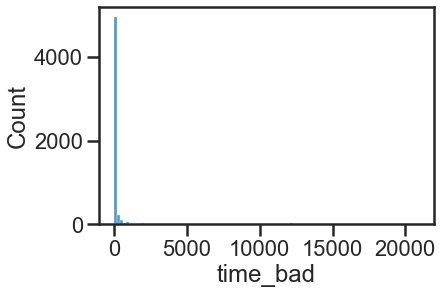

In [24]:
print(data_comb.shape)
sns.histplot(data_comb['time_bad'], bins=100)
plt.show()

#### Drop VDM intake data that did not occur while there was an RFID reading also (these are most likely leaks from the VDM and not a miss on the RFID monitor)

In [44]:
print(data_comb.shape)
data_comb_OK = data_comb[data_comb['time_bad'] == 0]
print(data_comb_OK.shape)

(5676, 26)
(2907, 26)


#### Map RFIDs for Cage 1 by date

In [45]:
data_VDM_tidy_intake_c1 = data_VDM_tidy_intake[data_VDM_tidy_intake['Cage_VDM'] == 1]

RFID_date_map = {'200913': '041A555768',
                 '200921': '041A555A78',
                 '200928': '041A555996',
                 '201004': '041A55564D'}

data_VDM_tidy_intake_c1['RFID_assign_pre'] = data_VDM_tidy_intake_c1['StartDate'].map(RFID_date_map)
print(data_VDM_tidy_intake_c1.shape)

data_VDM_tidy_intake_c1.head()

(1959, 17)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_assign_pre
226886,1,r1,1m,etoh,200928,9/28/2020 19:42,VDM_10_etoh,0.0022,2020-09-28 19:42:00,1.601322e+09,2020-09-28,28,19:42:00,19,42,dark,041A555996
226888,1,r1,1m,etoh,200928,9/28/2020 19:42,VDM_10_etoh,0.0022,2020-09-28 19:42:00,1.601322e+09,2020-09-28,28,19:42:00,19,42,dark,041A555996
226892,1,r1,1m,etoh,200928,9/28/2020 19:42,VDM_10_etoh,0.0022,2020-09-28 19:42:00,1.601322e+09,2020-09-28,28,19:42:00,19,42,dark,041A555996
226896,1,r1,1m,etoh,200928,9/28/2020 19:42,VDM_10_etoh,0.0022,2020-09-28 19:42:00,1.601322e+09,2020-09-28,28,19:42:00,19,42,dark,041A555996
239122,1,r1,1m,etoh,200928,9/28/2020 22:24,VDM_10_etoh,0.0022,2020-09-28 22:24:00,1.601332e+09,2020-09-28,28,22:24:00,22,24,dark,041A555996


In [46]:
#combine back together
data_comb_OK = pd.concat([data_comb_OK, data_VDM_tidy_intake_c1], axis=0)
print(data_comb_OK.shape)
data_comb_OK.tail()

(4866, 26)


,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post,time_diff_pre,time_diff_post,time_bad
12030686,1,r1,1m,etoh,200921,09/25/20 10:40:11,VDM_H20,0.027,2020-09-25 10:40:11,1.601030e+09,2020-09-25,25,10:40:11,10,40,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12030688,1,r1,1m,etoh,200921,09/25/20 10:40:13,VDM_H20,0.054,2020-09-25 10:40:13,1.601030e+09,2020-09-25,25,10:40:13,10,40,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12030690,1,r1,1m,etoh,200921,09/25/20 10:40:14,VDM_H20,0.027,2020-09-25 10:40:14,1.601030e+09,2020-09-25,25,10:40:14,10,40,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12030694,1,r1,1m,etoh,200921,09/25/20 10:40:17,VDM_H20,0.027,2020-09-25 10:40:17,1.601030e+09,2020-09-25,25,10:40:17,10,40,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12030700,1,r1,1m,etoh,200921,09/25/20 10:40:22,VDM_H20,0.027,2020-09-25 10:40:22,1.601030e+09,2020-09-25,25,10:40:22,10,40,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Add metadata

In [47]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/Ethanol/RFID/meta_data_1m.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_comb_OK = meta_data.merge(data_comb_OK.reset_index(), left_on='IdRFID', right_on='RFID_assign_pre', sort=False)

print(data_comb_OK.shape)
data_comb_OK.head()

(4866, 35)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post,time_diff_pre,time_diff_post,time_bad
0,2,1,997,sham,041A555A78,2020-09-21 12:02:50,26.7,leak,2614940,1,r1,1m,etoh,200921,09/21/20 21:58:46,VDM_10_etoh,0.0066,2020-09-21 21:58:46,1.600726e+09,2020-09-21,21,21:58:46,21,58,dark,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,997,sham,041A555A78,2020-09-21 12:02:50,26.7,leak,2666538,1,r1,1m,etoh,200921,09/22/20 09:23:19,VDM_10_etoh,0.0044,2020-09-22 09:23:19,1.600767e+09,2020-09-22,22,09:23:19,9,23,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,997,sham,041A555A78,2020-09-21 12:02:50,26.7,leak,2685278,1,r1,1m,etoh,200921,09/22/20 13:31:56,VDM_10_etoh,0.0022,2020-09-22 13:31:56,1.600782e+09,2020-09-22,22,13:31:56,13,31,light,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,997,sham,041A555A78,2020-09-21 12:02:50,26.7,leak,2711148,1,r1,1m,etoh,200921,09/22/20 19:15:08,VDM_10_etoh,0.0022,2020-09-22 19:15:08,1.600802e+09,2020-09-22,22,19:15:08,19,15,dark,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,997,sham,041A555A78,2020-09-21 12:02:50,26.7,leak,2722952,1,r1,1m,etoh,200921,09/22/20 21:51:44,VDM_10_etoh,0.0022,2020-09-22 21:51:44,1.600812e+09,2020-09-22,22,21:51:44,21,51,dark,NaN,041A555A78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Add day, hour, and min counts

In [48]:
#split by round to get specific dates
data_comb_r1 = data_comb_OK[data_comb_OK['Round'] == 1]
data_comb_r2 = data_comb_OK[data_comb_OK['Round'] == 2]
data_comb_r3 = data_comb_OK[data_comb_OK['Round'] == 3]
data_comb_r4 = data_comb_OK[data_comb_OK['Round'] == 4]

#column of running day count
dat_map = dict(zip(data_comb_r1['date'].unique(), np.arange(1,len(data_comb_r1['date'].unique())+1)))
data_comb_r1['day_count'] = data_comb_r1['date'].map(dat_map)
#column of running hour and minute count
data_comb_r1['hour_count'] = (data_comb_r1['day_count']*24) + data_comb_r1['hour'] - 24
data_comb_r1['min_count'] = (data_comb_r1['hour_count']*60) + data_comb_r1['min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r2['date'].unique(), np.arange(1,len(data_comb_r2['date'].unique())+1)))
data_comb_r2['day_count'] = data_comb_r2['date'].map(dat_map)
#column of running hour and minute count
data_comb_r2['hour_count'] = (data_comb_r2['day_count']*24) + data_comb_r2['hour'] - 24
data_comb_r2['min_count'] = (data_comb_r2['hour_count']*60) + data_comb_r2['min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r3['date'].unique(), np.arange(1,len(data_comb_r3['date'].unique())+1)))
data_comb_r3['day_count'] = data_comb_r3['date'].map(dat_map)
#column of running hour and minute count
data_comb_r3['hour_count'] = (data_comb_r3['day_count']*24) + data_comb_r3['hour'] - 24
data_comb_r3['min_count'] = (data_comb_r3['hour_count']*60) + data_comb_r3['min'] - 60

#column of running day count
dat_map = dict(zip(data_comb_r4['date'].unique(), np.arange(1,len(data_comb_r4['date'].unique())+1)))
data_comb_r4['day_count'] = data_comb_r4['date'].map(dat_map)
#column of running hour and minute count
data_comb_r4['hour_count'] = (data_comb_r4['day_count']*24) + data_comb_r4['hour'] - 24
data_comb_r4['min_count'] = (data_comb_r4['hour_count']*60) + data_comb_r4['min'] - 60

#combine back together
data_comb_final = pd.concat([data_comb_r1, data_comb_r2, data_comb_r3, data_comb_r4], axis=0)
print(data_comb_final.shape)
data_comb_final.head()

(4866, 38)


,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post,time_diff_pre,time_diff_post,time_bad,day_count,hour_count,min_count
2264,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611596,1,r1,1m,etoh,200913,09/14/20 12:21:50,VDM_10_etoh,0.0022,2020-09-14 12:21:50,1.600086e+09,2020-09-14,14,12:21:50,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681
2265,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611598,1,r1,1m,etoh,200913,09/14/20 12:21:51,VDM_10_etoh,0.0066,2020-09-14 12:21:51,1.600086e+09,2020-09-14,14,12:21:51,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681
2266,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611600,1,r1,1m,etoh,200913,09/14/20 12:21:53,VDM_10_etoh,0.0044,2020-09-14 12:21:53,1.600086e+09,2020-09-14,14,12:21:53,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681
2267,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635168,1,r1,1m,etoh,200913,09/14/20 17:34:33,VDM_10_etoh,0.0022,2020-09-14 17:34:33,1.600105e+09,2020-09-14,14,17:34:33,17,34,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17,994
2268,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635170,1,r1,1m,etoh,200913,09/14/20 17:34:35,VDM_10_etoh,0.0022,2020-09-14 17:34:35,1.600105e+09,2020-09-14,14,17:34:35,17,34,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17,994


#### Compute intake per body weight

In [49]:
data_comb_final['drink_bw'] = data_comb_final['value'] / (data_comb_final['weight_pre'] /1000)

### Export data

In [50]:
data_VDM_tidy_intake.to_csv('data_VDM_tidy_intake_1m.csv')
data_RFID_final.to_csv('data_RFID_final_1m.csv')
data_comb_final.to_csv('data_comb_final_1m.csv')

### Viz

In [51]:
data_comb_final.head()

,Round,Cage,Animal,Injury,IdRFID,we_switch,weight_pre,notes,index,Cage_VDM,Cohort,TP,Drink,StartDate,Time,variable,value,datetime,timestamp,date,day,time,hour,min,ld_seg,RFID_eventDuration,RFID_assign_pre,RFID_assign_post,RFID_time_pre,RFID_time_post,RFID_date_pre,RFID_date_post,time_diff_pre,time_diff_post,time_bad,day_count,hour_count,min_count,drink_bw
2264,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611596,1,r1,1m,etoh,200913,09/14/20 12:21:50,VDM_10_etoh,0.0022,2020-09-14 12:21:50,1.600086e+09,2020-09-14,14,12:21:50,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681,0.07483
2265,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611598,1,r1,1m,etoh,200913,09/14/20 12:21:51,VDM_10_etoh,0.0066,2020-09-14 12:21:51,1.600086e+09,2020-09-14,14,12:21:51,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681,0.22449
2266,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1611600,1,r1,1m,etoh,200913,09/14/20 12:21:53,VDM_10_etoh,0.0044,2020-09-14 12:21:53,1.600086e+09,2020-09-14,14,12:21:53,12,21,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12,681,0.14966
2267,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635168,1,r1,1m,etoh,200913,09/14/20 17:34:33,VDM_10_etoh,0.0022,2020-09-14 17:34:33,1.600105e+09,2020-09-14,14,17:34:33,17,34,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17,994,0.07483
2268,1,1,1027,blast,041A555768,2020-09-13 17:08:27,29.4,NaN,1635170,1,r1,1m,etoh,200913,09/14/20 17:34:35,VDM_10_etoh,0.0022,2020-09-14 17:34:35,1.600105e+09,2020-09-14,14,17:34:35,17,34,light,NaN,041A555768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,17,994,0.07483


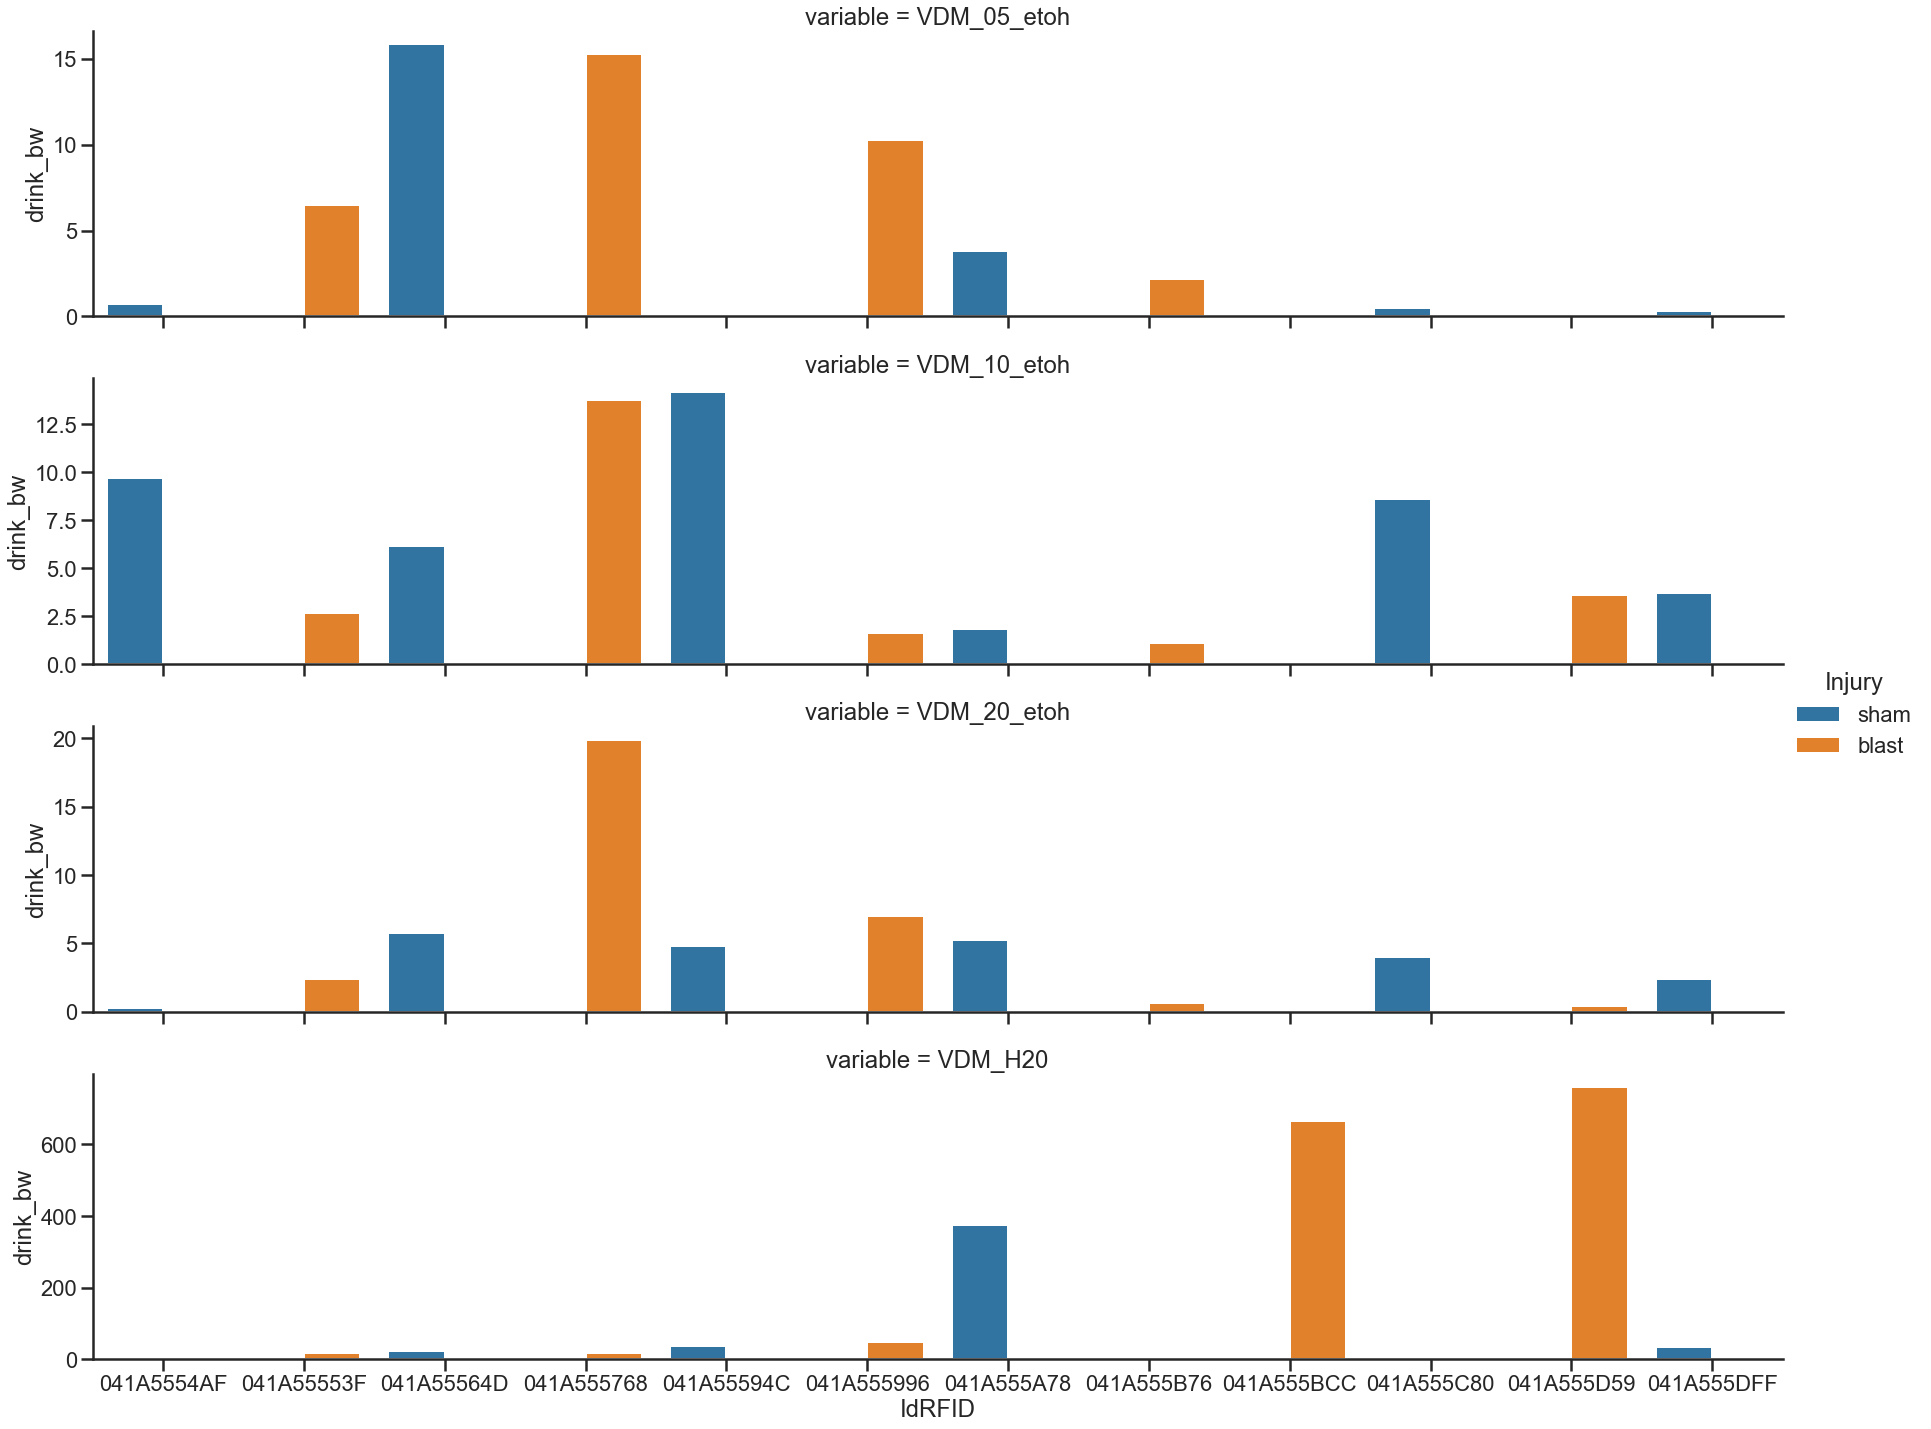

In [71]:
data_int = data_comb_final.groupby(['IdRFID', 'variable', 'Injury']).sum().reset_index()

sns.catplot(x='IdRFID', y='drink_bw', data=data_int, kind='bar', hue='Injury', 
            size=5, ci=68, aspect=5, 
            sharex=True, sharey=False,
            col='variable', col_wrap=1)

#### heat map

blast


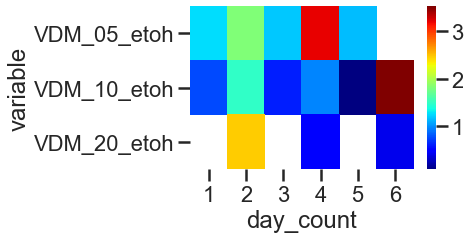

sham


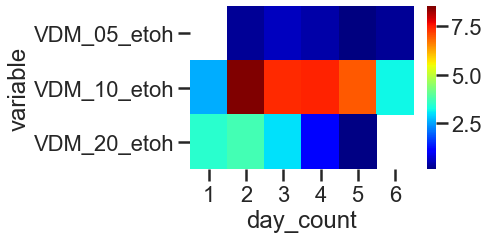

In [63]:
data = data_comb_final[data_comb_final['Cage'] == 2]
data = data[data['variable'] != 'VDM_H20']

for variable in data['Injury'].unique():
    print(variable)
    #select variable
    data_int = data[(data['Injury'] == variable)]
    #compute intake count by cage and hour
    groupby = data_int.groupby(['variable', 'day_count'])['drink_bw'].sum().reset_index()
    #viz
    groupby = groupby.pivot("variable", "day_count", "drink_bw")
    plt.figure(figsize=(5,3))
    ax = sns.heatmap(groupby, cmap="jet")
    plt.show()

#### rasters

In [72]:
data_comb_final['IdRFID'].value_counts()

041A555D59    1081
041A555BCC    886 
041A555768    635 
041A55564D    496 
041A555A78    435 
041A555996    393 
041A55594C    258 
041A55553F    202 
041A555C80    150 
041A5554AF    139 
041A555DFF    102 
041A555B76    89  
Name: IdRFID, dtype: int64

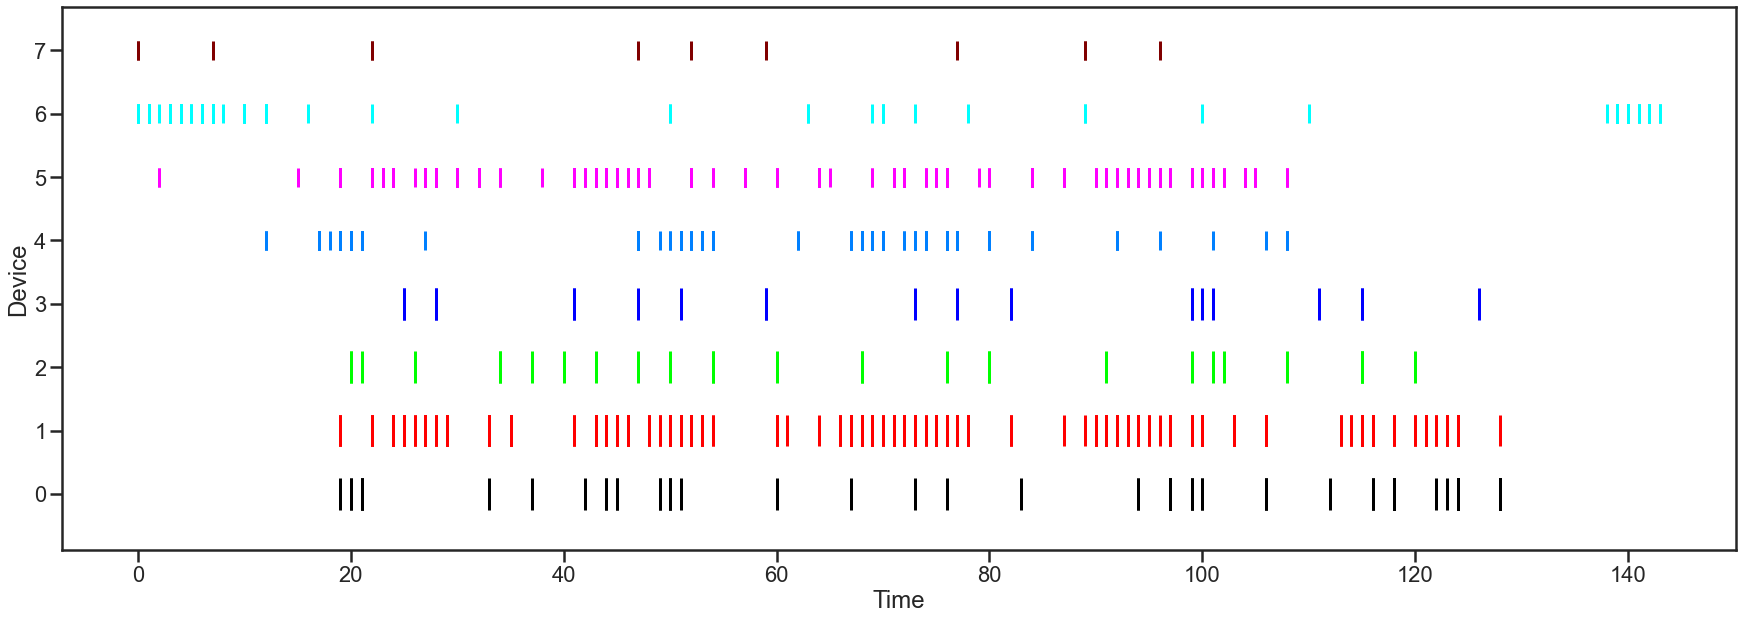

In [85]:
# Set the random seed for data generation

np.random.seed(39)


# Set different colors for each neuron

# Set different colors for each neuron

colorCodes = np.array([[0, 0, 0],

                        [1, 0, 0],

                        [0, 1, 0],

                        [0, 0, 1],

                        [0, .5, 1],

                        [1, 0, 1],

                        [0, 1, 1],

                        [.5, 0, 0]])

                       

# Set spike colors for each neuron

lineSize = [0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.3]                               

param = 'hour_count'

data = data_comb_final

data_1 = data[(data_comb_final['IdRFID'] == '041A55564D')]
data_2 = data[(data_comb_final['IdRFID'] == '041A555768')]

data_V11 = data_1[data_1['variable'] == 'VDM_10_etoh'][param].values
data_V21 = data_1[data_1['variable'] == 'VDM_05_etoh'][param].values
data_V31 = data_1[data_1['variable'] == 'VDM_20_etoh'][param].values
data_V41 = data_1[data_1['variable'] == 'VDM_H20'][param].values

data_V12 = data_2[data_2['variable'] == 'VDM_10_etoh'][param].values
data_V22 = data_2[data_2['variable'] == 'VDM_05_etoh'][param].values
data_V32 = data_2[data_2['variable'] == 'VDM_20_etoh'][param].values
data_V42 = data_2[data_2['variable'] == 'VDM_H20'][param].values

data_array = np.array([data_V11, data_V21, data_V31, data_V41, data_V12, data_V22, data_V32, data_V42])

# Draw a spike raster plot
plt.figure(figsize=(30,10))
plt.eventplot(data_array, color=colorCodes, linelengths = lineSize)  
plt.xlabel('Time')
plt.ylabel('Device')

#plt.xticks(data_array, data_VDM_tidy_intake['datetime'], color='orange', rotation=45, )

plt.show()